# LAB 6: Starting to solve

###### 1. Read (carefully!) Chapter 6 from the Student's Guide and complete all the "Your Turns".

a) Your Turn 6A

In [59]:
def distance(point1, point2):
    """
    Computes the straight-line distance between two points in three-dimensional space.
        point1 = (x1, y1, z1)
        point2 = (x2, y2, z2)
    Returns the result of the pythagorean theorem for the three components of the two points.
    """
    d = ( (point2[0]-point1[0])**2 + (point2[1]-point1[1])**2 + (point2[2]-point1[2])**2 ) ** 0.5
    return d

b) Your Turn 6B

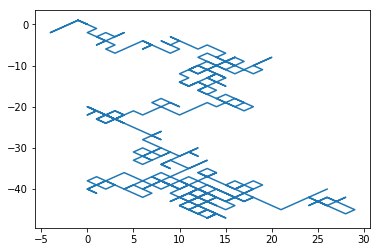

In [71]:
from numpy.random import random as rng
num_steps = 500
x_step = rng(num_steps)
y_step = rng(num_steps)

#Part a
x_step[x_step > 0.5] = 1
x_step[x_step < 0.5] = -1
y_step[y_step > 0.5] = 1
y_step[y_step < 0.5] = -1

#Part b
x = np.cumsum(x_step)
y = np.cumsum(y_step)

#Part c
plt.plot(x, y)

c) Your Turn 6C

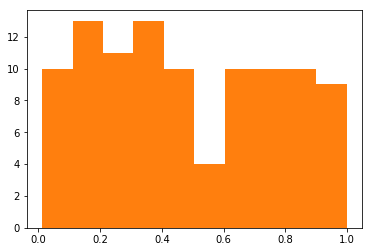

In [92]:
import matplotlib.pyplot as plt, numpy as np
data = rng(100)
plt.hist(data)
counts, bin_edges, _ = plt.hist(data)
counts, bin_edges = np.histogram(data)

# bin_size = bin_edges[1] - bin_edges[0]
# new_widths = bin_size * counts / counts.max()
# plt.bar(bin_edges[:-1], counts, width=new_widths, color=['r', 'g', 'b'])

d) Your Turn 6D

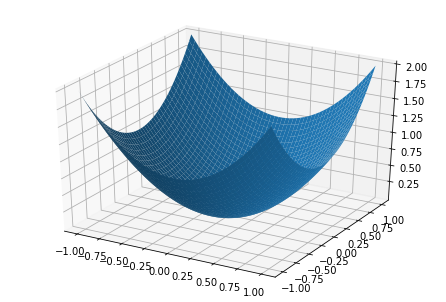

In [34]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1,1)
y = np.linspace(-1,1)

X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2)

ax = Axes3D(plt.figure())
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1)

e) Your Turn 6E

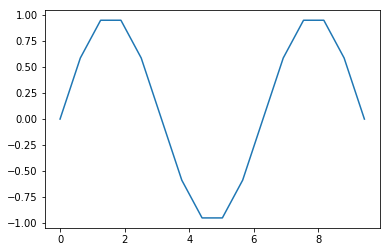

In [13]:
from scipy.integrate import quad
x_max = np.linspace(0, 3*np.pi, 16)
integral = np.zeros(x_max.size)
for i in range(x_max.size):
    integral[i], error = quad(np.cos, 0, x_max[i])
plt.plot(x_max, integral)

Analytically, the integral of cos(x)dx is sin(x). When we plug in the bounds of x_max and 0, we get sin(x_max)-sin(0), which is is just sin(x_max) - 0, so with the plot, we should see a sine graph for different values of x_max. We can see that quad is taking the integral computationally, like a calculator does. This is why the curve is not smooth, but rather has some flat sections. This is because there are too few points to give a smooth curve. Changing the last argument in np.linespace from 16 to something large like 100 will resolve this problem and prove that quad essentially gives the same result as taking the integral analytically.

f) Your Turn 6F

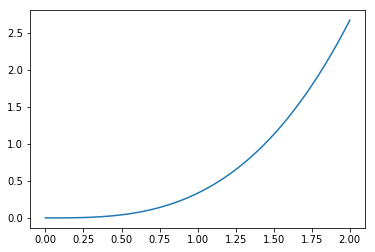

In [61]:
#Part a
x_max = np.linspace(0, 2, 50)
integral = np.zeros(x_max.size)
def square(x):
    return x*x
for i in range(x_max.size):
    integral[i], error = quad(square, 0, x_max[i])
plt.plot(x_max, integral)

(a) The integral of x^2 is (1/3)x^3, which is what is plotted above for 0 < x < 2. Therefore, quad got it right!

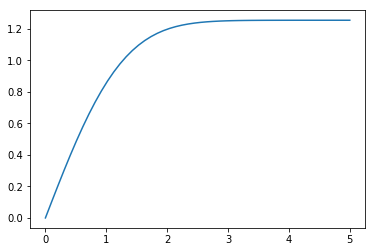

In [60]:
#Part b
x_max = np.linspace(0, 5, 50)
integral = np.zeros(x_max.size)
def func(x):
    return np.exp(-(x*x)/2)
for i in range(x_max.size):
    integral[i], error = quad(func, 0, x_max[i])
plt.plot(x_max, integral)

(b) I used Wolfram Alpha to confirm that the above result is correct. The integral of the function, analytically, gives the error function with some constants. This is, in fact, what is plotted above.

g) Your Turn 6G

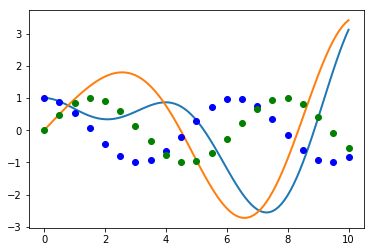

In [66]:
def F(y, t):
    """
    Return derivatives for second-order ODE y'' = -y.
    """
    dy = [0, 0]
    dy[0] = y[1] 
    dy[1] = -y[0] + np.sin(0.8*t)
    return dy

""" ODE solver for harmonic oscillator. """
from scipy.integrate import odeint
t_min = 0
t_max = 10
dt = 0.1
t = np.arange(t_min, t_max+dt, dt)

initial_conditions = [ (1.0, 0.0), (0.0, 1.0) ]

plt.figure()
for y0 in initial_conditions:
    y = odeint(F, y0, t)
    plt.plot(t, y[:, 0], linewidth=2)

skip = 5
t_test = t[::skip]
plt.plot(t_test, np.cos(t_test), 'bo')
plt.plot(t_test, np.sin(t_test), 'go')

When the driving force is incorporated, the solutions (the orange and blue lines) no longer match the exact solutions shown previously with the blue and green dots. This is because the driving force, which is added to dy[1], aka the second derivative of y(t), changes the oscillation. This is evident when t_max is increased to larger values to see how the first and second derivatives start out of sync. Without the driving force, they stay out of sync; but with the driving force, the first and second derivatives (the two lines) begin to sync up and oscillate more closely together, as a forced/driven harmonic oscillator would. 

h) Your Turn 6H

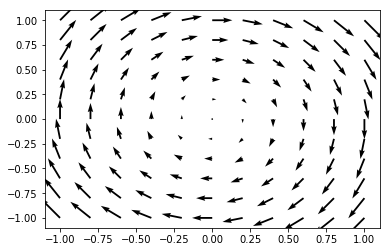

In [20]:
coords = np.linspace(-1, 1, 11)
X, Y = np.meshgrid(coords, coords)
Vx, Vy = Y, -X
plt.quiver(X, Y, Vx, Vy)

The "vortex" pattern above is a two-dimensional vector field where the x and y coordinates range from -1 to 1 and the length of the vector is specified by the velocity (Vx and Vy) at each point (x, y). The x-component of velolcity is given by the y values and the y-component of velolcity is given by the negative of the x values. The result is a vortex that swirls clockwise with smaller velocities at the center and larger velocities farther from the center. 

i) Your Turn 6I

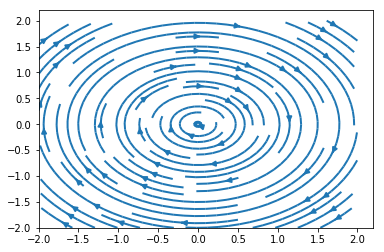

In [24]:
#Original Code
lower, upper, step = -2, 2, 0.1
coords = np.arange(lower, upper + step, step)
X, Y = np.meshgrid(coords, coords)
Vx, Vy = Y, -X
plt.streamplot(X, Y, Vx, Vy, linewidth=2)

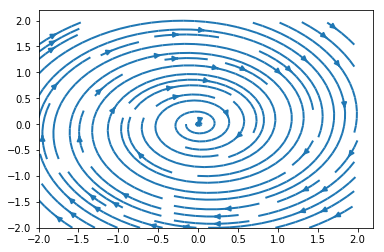

In [25]:
lower, upper, step = -2, 2, 0.1
coords = np.arange(lower, upper + step, step)
X, Y = np.meshgrid(coords, coords)
Vx = Y - 0.1 * X
Vy = -X - 0.1 * Y
plt.streamplot(X, Y, Vx, Vy, linewidth=2)

The streamlines are different than in the previous code, but do still circle in the same clockwise direction. The plot shows the trajectories from a vector field wherein the velocity is slightly smaller than in the previous code, except where the values of (x, y) are negative. Following the streamlines gives solutions for this ordinary differential equation. 

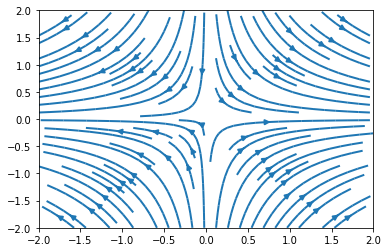

In [26]:
lower, upper, step = -2, 2, 0.1
coords = np.arange(lower, upper + step, step)
X, Y = np.meshgrid(coords, coords)
Vx, Vy = X, -Y
plt.streamplot(X, Y, Vx, Vy, linewidth=2)

The only difference between here and the original code is that the velocity values are flipped, meaning that for the exact same points (x, y), the velocity's components go from (Y, -X) to (X, -Y). This actually drastically changes the streamlines to show a different set of solutions within the vector field. We can see that they go to infinity when either x and y equal zero...this was not the case with the original code at all, which formed a circular pattern.